In [26]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

import config as cfg

In [27]:
model = YOLO('yolo11x-pose.pt')
# video = './data/single-arm-lat-pull-down-1.MOV'
# results = model(source=video, save=True)

In [74]:
# video_path = './data/1/1-frontcut.mp4'
video_path = './data/1/1-leftcut.mp4'
result = model(source=video_path)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/937) c:\Users\\Desktop\code\gym-analytics\data\1\1-leftcut.mp4: 384x640 1 person, 210.0ms
video 1/1 (frame 2/937) c:\Users\\Desktop\code\gym-analytics\data\1\1-leftcut.mp4: 384x640 1 person, 24.2ms
video 1/1 (frame 3/937) c:\Users\\Desktop\code\gym-analytics\data\1\1-leftcut.mp4: 384x640 1 person, 27.0ms
video 1/1 (frame 4/937) c:\Users\\Desktop\code\gym-analytics\data\1\1-leftcut.mp4: 384x640 1 person, 19.7ms
video 1/1 (frame 5/937) c

In [11]:
import json

pose_results = []
for idx, r in enumerate(result):
    frame_data = {
        "image": f"frame_{idx:04d}.jpg",
        "predictions": []
    }

    for box, keypoints, conf in zip(r.boxes.xyxy, r.keypoints.xy, r.boxes.conf):
        frame_data["predictions"].append({
            "bbox": box.tolist(),               # [x1, y1, x2, y2]
            "confidence": float(conf),
            "keypoints": keypoints.tolist()     # [[x1, y1], [x2, y2], ..., [x17, y17]]
        })

    pose_results.append(frame_data)

# Save to JSON
with open("pose_predictions.json", "w") as f:
    json.dump(pose_results, f, indent=2)

In [64]:
result[i].keypoints.xy[0][0].tolist()

[619.285888671875, 442.03778076171875]

In [57]:
for i in range(100):
    if result[i].keypoints.xy.shape[0] < 2:
        print(result[i].keypoints.xy.shape)
# print(result[0].keypoints.xy[])

In [75]:
import xml.etree.ElementTree as ET

def modify_points(xml_path, output_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # id가 "0"인 track만 선택
    for id in range(17):
        for track in root.findall(f".//track[@id='{id}']"):
            for pidx, points_tag in enumerate(track.findall("points")):
                points_str = points_tag.get("points")
                if points_str:
                    try:
                        x_str, y_str = points_str.split(',')
                        x_new, y_new = result[pidx*2].keypoints.xy[0][id].tolist()
                        print(f"FRAME {pidx*2}, x: {x_new:.2f}, y: {y_new:.2f}")
                        # print(x_new,y_new)
                        points_tag.set("points", f"{x_new:.2f},{y_new:.2f}")
                    except ValueError:
                        print(f"Invalid point format: {points_str}")
    tree.write(output_path, encoding='utf-8', xml_declaration=True)

# 사용 예시
modify_points("annotations.xml", "output.xml")


FRAME 0, x: 612.76, y: 250.52
FRAME 2, x: 612.28, y: 250.41
FRAME 4, x: 611.30, y: 251.19
FRAME 6, x: 610.76, y: 251.87
FRAME 8, x: 607.99, y: 252.80
FRAME 10, x: 605.25, y: 251.99
FRAME 12, x: 602.16, y: 252.71
FRAME 14, x: 600.69, y: 255.32
FRAME 16, x: 597.13, y: 258.02
FRAME 18, x: 593.04, y: 262.21
FRAME 20, x: 588.64, y: 267.44
FRAME 22, x: 587.00, y: 274.32
FRAME 24, x: 582.95, y: 281.82
FRAME 26, x: 579.48, y: 289.10
FRAME 28, x: 574.64, y: 297.85
FRAME 30, x: 572.84, y: 308.94
FRAME 32, x: 570.89, y: 318.78
FRAME 34, x: 568.59, y: 329.42
FRAME 36, x: 568.36, y: 339.12
FRAME 38, x: 569.90, y: 350.94
FRAME 40, x: 568.74, y: 360.84
FRAME 42, x: 569.21, y: 370.31
FRAME 44, x: 569.25, y: 375.40
FRAME 46, x: 569.08, y: 381.95
FRAME 48, x: 572.37, y: 388.57
FRAME 50, x: 572.86, y: 390.87
FRAME 52, x: 573.97, y: 395.55
FRAME 54, x: 573.75, y: 396.22
FRAME 56, x: 575.13, y: 395.94
FRAME 58, x: 573.68, y: 392.13
FRAME 60, x: 572.65, y: 390.57
FRAME 62, x: 573.51, y: 390.33
FRAME 64, x: 

In [ ]:

results[0].keypoints.xy[0].tolist()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/933) c:\Users\\Desktop\code\gym-analytics\data\1\1-frontcut.mp4: 384x640 2 persons, 21.0ms
video 1/1 (frame 2/933) c:\Users\\Desktop\code\gym-analytics\data\1\1-frontcut.mp4: 384x640 2 persons, 24.5ms
video 1/1 (frame 3/933) c:\Users\\Desktop\code\gym-analytics\data\1\1-frontcut.mp4: 384x640 2 persons, 25.9ms
video 1/1 (frame 4/933) c:\Users\\Desktop\code\gym-analytics\data\1\1-frontcut.mp4: 384x640 2 persons, 19.7ms
video 1/1 (frame 5

In [12]:
import pickle
video_name = '14-backcut'
with open(f'./output/{video_name}/{video_name}.pkl', 'rb') as f:
    data = pickle.load(f)
print(data['data'])


{0: [tensor([606.7461, 352.8550,   0.9556]), tensor([605.3864, 355.0149,   0.9682]), tensor([605.5096, 354.7126,   0.9659]), tensor([604.2296, 358.9518,   0.9632]), tensor([603.3065, 357.2623,   0.9540]), tensor([602.5815, 355.3514,   0.9491]), tensor([602.5084, 354.4095,   0.9416]), tensor([602.3950, 354.4946,   0.9518]), tensor([599.9529, 356.6784,   0.9742]), tensor([601.6427, 358.6202,   0.9876]), tensor([601.6932, 360.6483,   0.9881]), tensor([602.4709, 361.4006,   0.9852]), tensor([604.0515, 361.7067,   0.9815]), tensor([604.0049, 364.4463,   0.9675]), tensor([607.4949, 370.4455,   0.9220]), tensor([610.0928, 369.6849,   0.9328]), tensor([612.5576, 370.5253,   0.9130]), tensor([612.5735, 371.4069,   0.8494]), tensor([612.0755, 373.1408,   0.8792]), tensor([611.6816, 373.7468,   0.7870]), tensor([611.8664, 375.1053,   0.8242]), tensor([612.5795, 376.8054,   0.7714]), tensor([615.2573, 375.8295,   0.7731]), tensor([616.7579, 375.7191,   0.7505]), tensor([618.6127, 375.7750,   0.767

In [11]:
print(len(data['data'][0]))

929


In [32]:
data = {'keypoints': [], 'conf': []}
for frame_idx, result in enumerate(results):
    data['keypoints'].append(result.keypoints.xy.tolist()[0])

In [35]:
data['keypoints'] = np.array(data['keypoints'])
np.shape(data['keypoints'])

(929, 17, 2)

In [ ]:
class Keypoint(object):
    def __init__(self, x, y):
        self.xy = [x, y]

class YoloOutput(object):
    def __init__(self, d):
        self.d = d
        self.n_frame = len(d[0])
        self.keypoints = {'xy': np.zeros((self.n_frame, 17, 2))}
        for kp in range(17):
            self.keypoints['xy'][:, kp, :] = np.array(d[kp])[:, :2]
tmp = YoloOutput(data['data'])

In [17]:
tmp.keypoints.xy[0]

AttributeError: 'dict' object has no attribute 'xy'

In [8]:
np.shape(result[0].keypoints.xy[0].tolist())

(17, 2)

In [ ]:
def data2list(data):
    

In [ ]:
import pickle
import numpy as np
from ultralytics import YOLO
import xml.dom.minidom as minidom
import xml.etree.ElementTree as ET

def prettify_and_save_xml(root_element, filename):
    rough_string = ET.tostring(root_element, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    with open(filename, "w", encoding="utf-8") as f:
        f.write(reparsed.toprettyxml(indent="  "))  # 2-space indentation

video_name = '1-frontcut'
try:
    with open(f'./output/{video_name}/{video_name}.pkl', 'rb') as f:
        data = pickle.load(f)
    
model = YOLO('yolo11x-pose.pt')
video_path = './data/1/1-leftcut.mp4'
results = model(source=video_path)

keypoint_labels = ["nose", "leye", "reye", "lear", "rear",
                   "lshoulder", "rshoulder", "lelbow", "relbow",
                   "lwrist", "rwrist", "lhip", "rhip",
                   "lknee", "rknee", "lankle", "rankle"]
num_keypoints = len(keypoint_labels)

annotations = ET.Element("annotations")
ET.SubElement(annotations, "version").text = "1.1"

# keypoint별 track 생성
tracks = []
for idx, label in enumerate(keypoint_labels):
    track = ET.SubElement(annotations, "track", id=str(idx), label=label, source="manual")
    tracks.append(track)

frame_num = 0
frame_step = 2
for ridx, result in enumerate(results):
    if ridx % frame_step == 0:
        keypoints_list = result.keypoints.xy  # list of tensors, one per detected object

        if len(keypoints_list) == 0:
            frame_num += frame_step
            continue

        keypoints = keypoints_list[0].tolist()  # 첫 번째 사람만 사용 (원하면 여러명 지원 가능)
        for kp_idx, (x, y) in enumerate(keypoints):
            point = ET.SubElement(tracks[kp_idx], "points",
                                frame=str(frame_num),
                                keyframe="1",
                                outside="0",
                                occluded="0",
                                points=f"{x:.2f},{y:.2f}",
                                z_order="0")
            attr = ET.SubElement(point, "attribute", name="visibility")
            attr.text = "visible"  # YOLO는 visibility score 안 줌

        frame_num += frame_step

# XML 저장
tree = ET.ElementTree(annotations)
prettify_and_save_xml(annotations, "cvat_keypoints.xml")




WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/937) c:\Users\\Desktop\code\gym-analytics\data\1\1-leftcut.mp4: 384x640 1 person, 23.0ms
video 1/1 (frame 2/937) c:\Users\\Desktop\code\gym-analytics\data\1\1-leftcut.mp4: 384x640 1 person, 20.2ms
video 1/1 (frame 3/937) c:\Users\\Desktop\code\gym-analytics\data\1\1-leftcut.mp4: 384x640 1 person, 24.8ms
video 1/1 (frame 4/937) c:\Users\\Desktop\code\gym-analytics\data\1\1-leftcut.mp4: 384x640 1 person, 20.4ms
video 1/1 (frame 5/937) c:

In [50]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [111]:
def is_missing(point):
    """
    좌표 point가 (0,0)인지 판별.
    """
    return np.all(point == 0)

def find_missing_intervals(joint_data):
    """
    joint_data: (N, 2) shape의 한 관절 좌표 배열
    반환: missing 구간의 리스트 [(start_idx, end_idx), ...] 
          start_idx는 missing 구간의 시작 프레임, end_idx는 missing이 끝난 첫 프레임의 인덱스
    """
    intervals = []
    N = joint_data.shape[0]
    t = 0
    while t < N:
        if is_missing(joint_data[t]):
            start_idx = t
            while t < N and is_missing(joint_data[t]):
                t += 1
            end_idx = t  # missing이 아닌 첫 프레임 (또는 N)
            intervals.append((start_idx, end_idx))
        else:
            t += 1
    return intervals

def interpolate_interval(joint_data, prev_idx, next_idx, start_idx, end_idx):
    """
    joint_data: (N, 2) 배열, 한 관절에 대한 데이터
    prev_idx: missing 구간 이전에 valid한 프레임 인덱스
    next_idx: missing 구간 이후에 valid한 프레임 인덱스
    start_idx, end_idx: missing 구간 (start_idx 포함, end_idx 미포함)
    
    선형 보간을 수행하여 missing 구간을 채움.
    """
    prev_point = joint_data[prev_idx].astype(np.float32)
    next_point = joint_data[next_idx].astype(np.float32)
    gap = next_idx - prev_idx
    for t in range(start_idx, end_idx):
        ratio = (t - prev_idx) / gap
        joint_data[t] = prev_point + ratio * (next_point - prev_point)
    return joint_data

def interpolate_keypoints(keypoints):
    """
    keypoints: (N, 17, 2) numpy array, missing 좌표는 (0,0)으로 표시됨.
    반환: missing 좌표가 선형 보간 혹은 경계 처리로 채워진 배열.
    
    - 만약 가장 초기 프레임들이 missing인 경우, 첫 valid한 값으로 채움.
    - 만약 마지막 프레임들이 missing인 경우, 마지막 valid한 값으로 채움.
    - 중간에 missing 구간이 있으면 이전과 이후 valid 값으로 선형 보간.
    """
    keypoints_interp = keypoints.copy()
    num_frames, num_joints, _ = keypoints.shape

    # 각 관절별 처리
    for joint in range(num_joints):
        joint_data = keypoints_interp[:, joint].copy()  # (N,2)
        
        # 경계 처리: 처음 프레임이 missing인 경우
        if is_missing(joint_data[0]):
            # 첫번째 valid한 값 찾기
            first_valid = None
            for i in range(num_frames):
                if not is_missing(joint_data[i]):
                    first_valid = joint_data[i]
                    break
            # 전체가 missing인 경우는 건너뜀
            if first_valid is not None:
                joint_data[:i] = first_valid

        # 경계 처리: 마지막 프레임이 missing인 경우
        if is_missing(joint_data[-1]):
            last_valid = None
            for i in range(num_frames-1, -1, -1):
                if not is_missing(joint_data[i]):
                    last_valid = joint_data[i]
                    break
            if last_valid is not None:
                joint_data[i+1:] = last_valid

        # 중간 missing 구간에 대해 선형 보간 적용
        missing_intervals = find_missing_intervals(joint_data)
        for (start_idx, end_idx) in missing_intervals:
            # 이미 처리된 경계 구간은 건너뛰기
            if start_idx == 0 or end_idx == num_frames:
                continue

            prev_idx = start_idx - 1
            next_idx = end_idx
            # 이전과 이후 valid 값이 있는 경우 선형 보간
            if not is_missing(joint_data[prev_idx]) and not is_missing(joint_data[next_idx]):
                joint_data = interpolate_interval(joint_data, prev_idx, next_idx, start_idx, end_idx)
                
        keypoints_interp[:, joint] = joint_data

    return keypoints_interp

def smooth_joint_keypoints(joint_data, window_size=3):
    """
    joint_data: (N, 2) 배열, 한 관절의 x,y 좌표 시계열 데이터
    window_size: 이동 평균 윈도우 사이즈
    반환: smoothing 처리된 (N, 2) 배열
    
    경계 문제를 피하기 위해 'edge' 패딩을 사용.
    """
    smoothed_data = np.zeros_like(joint_data)
    for coord in range(2):
        x = joint_data[:, coord]
        pad_width = window_size // 2
        # 경계값 확장을 위해 'edge' 모드 사용
        x_padded = np.pad(x, pad_width, mode='reflect')
        # padding 후 valid convolution
        smoothed_data[:, coord] = np.convolve(x_padded, np.ones(window_size)/window_size, mode='valid')
    return smoothed_data

def smooth_all_keypoints(keypoints, window_size=3):
    """
    keypoints: (N, 17, 2) numpy array
    window_size: 이동 평균 윈도우 사이즈
    반환: 각 관절별로 moving average smoothing이 적용된 keypoints 배열.
    """
    keypoints_smoothed = keypoints.copy()
    num_frames, num_joints, _ = keypoints.shape

    for joint in range(num_joints):
        joint_data = keypoints_smoothed[:, joint].copy()  # (N,2)
        keypoints_smoothed[:, joint] = smooth_joint_keypoints(joint_data, window_size)
    return keypoints_smoothed

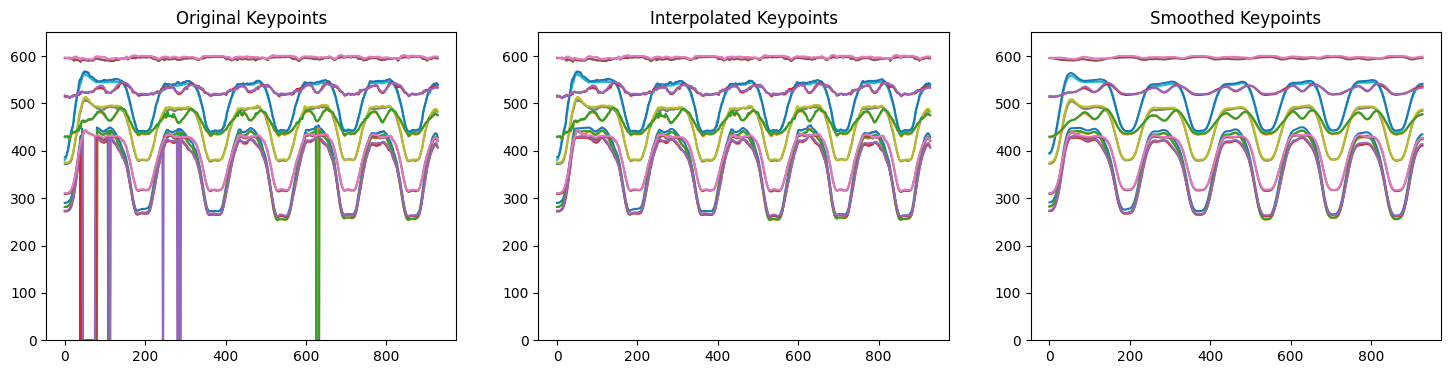

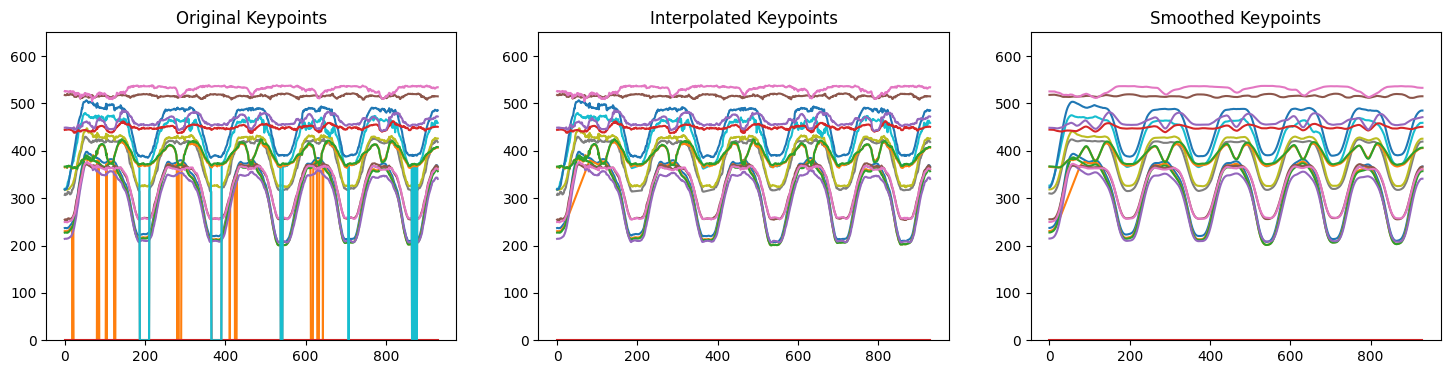

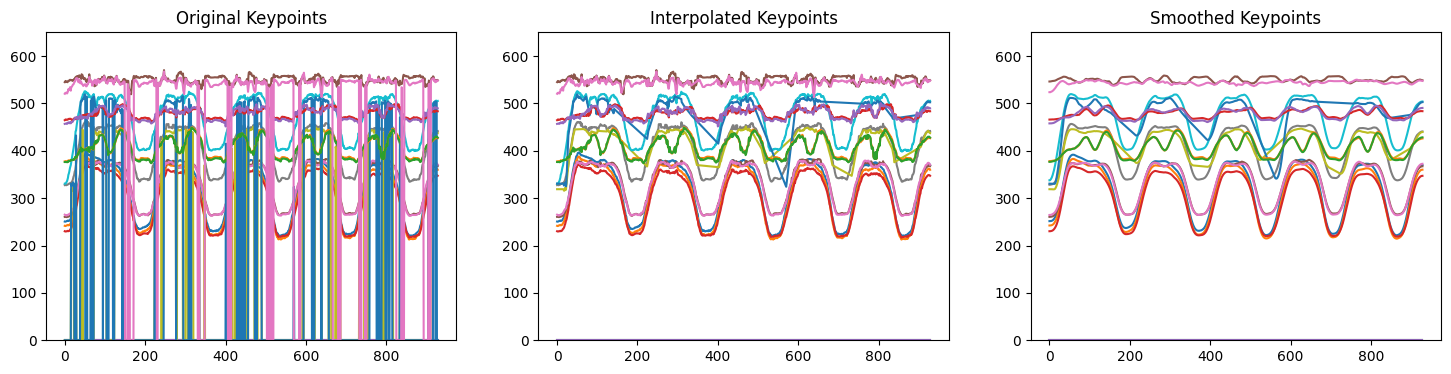

In [114]:
videos = ['1-frontcut', '1-rightcut', '1-leftcut']
video_name = '5-diagcut'
for video_name in videos:
    with open(f'./output/{video_name}/{video_name}.pkl', 'rb') as f:
        results = pickle.load(f)
    N_FRAMES = len(results['keypoints'])
    keypoints = np.array(results['keypoints'])
    interpolated_keypoints = interpolate_keypoints(keypoints)
    smoothed_keypoints = smooth_all_keypoints(interpolated_keypoints, window_size=21)
    
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Keypoints")
    for i in range(17):
        plt.plot(keypoints[:, i, 1])
    plt.ylim(0,650)
    plt.subplot(1, 3, 2)
    plt.title("Interpolated Keypoints")
    for i in range(17):
        plt.plot(interpolated_keypoints[:, i, 1])
    plt.ylim(0,650)
    plt.subplot(1, 3, 3)
    plt.title("Smoothed Keypoints")
    for i in range(17):
        plt.plot(smoothed_keypoints[:, i, 1])
    plt.ylim(0,650)
    plt.show()


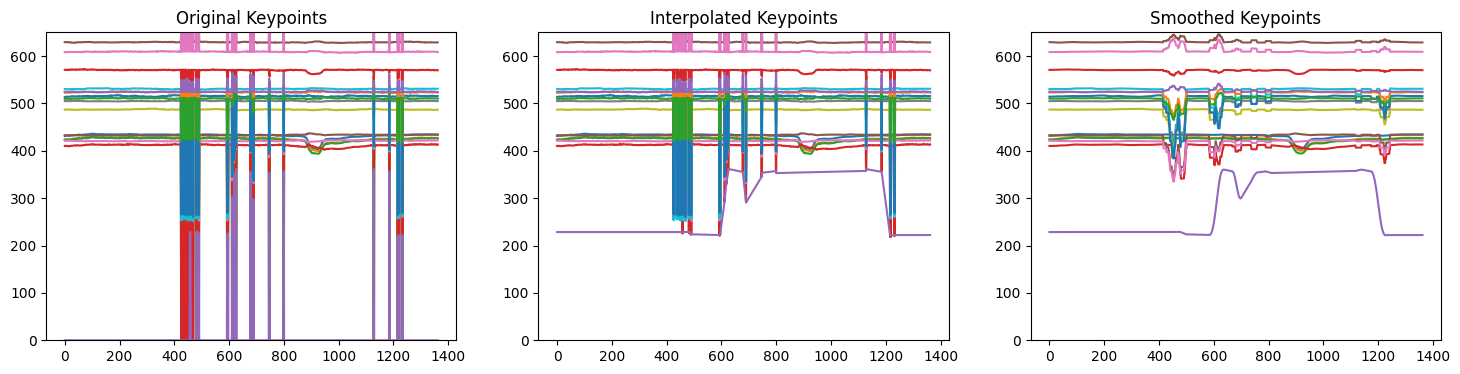

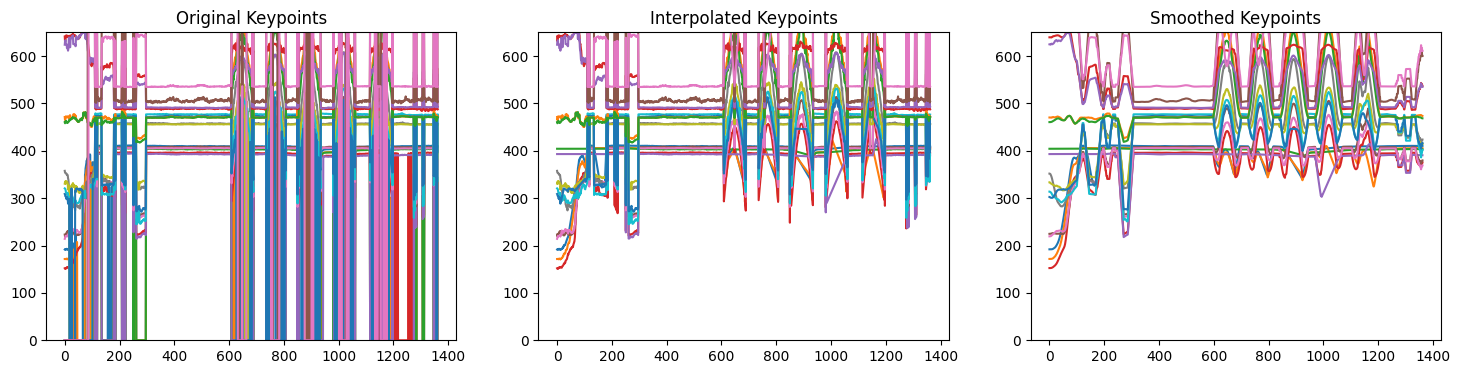

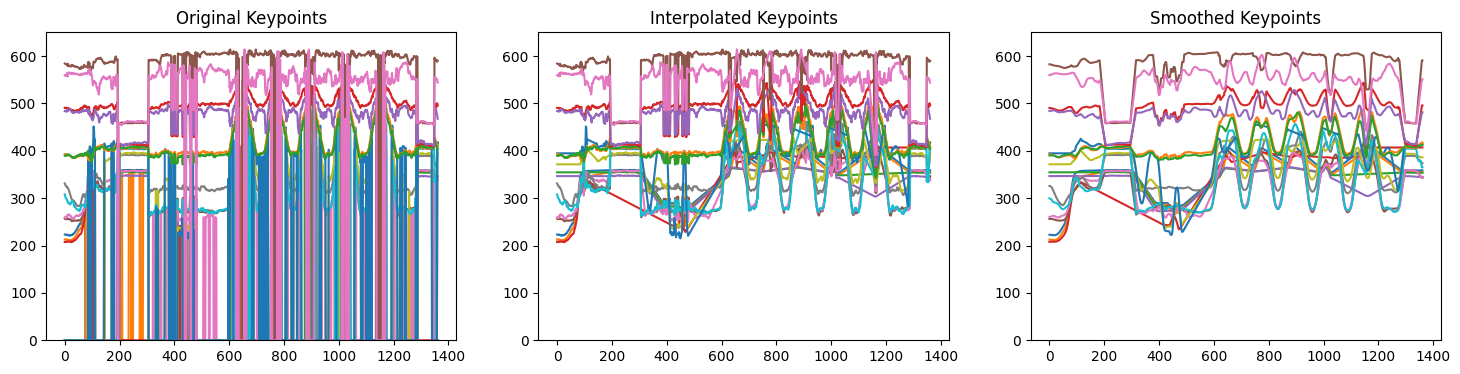

In [113]:
videos = ['1-frontcut', '1-rightcut', '1-leftcut']
videos = ['5-backcut', '5-diagcut', '5-leftcut']
video_name = '5-diagcut'
for video_name in videos:
    with open(f'./output/{video_name}/{video_name}.pkl', 'rb') as f:
        results = pickle.load(f)
    N_FRAMES = len(results['keypoints'])
    keypoints = np.array(results['keypoints'])
    interpolated_keypoints = interpolate_keypoints(keypoints)
    smoothed_keypoints = smooth_all_keypoints(interpolated_keypoints, window_size=21)
    
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Keypoints")
    for i in range(17):
        plt.plot(keypoints[:, i, 1])
    plt.ylim(0,650)
    plt.subplot(1, 3, 2)
    plt.title("Interpolated Keypoints")
    for i in range(17):
        plt.plot(interpolated_keypoints[:, i, 1])
    plt.ylim(0,650)
    plt.subplot(1, 3, 3)
    plt.title("Smoothed Keypoints")
    for i in range(17):
        plt.plot(smoothed_keypoints[:, i, 1])
    plt.ylim(0,650)
    plt.show()


In [115]:
import utils

utils.convert_avi_to_mp4('./output/L12/output.avi', './output/L12/output.mp4')

Video saved as ./output/L12/output.mp4
